Nama : Gulfi Oktariani

NIM : 09011381823118

Ujian Akhir Semester Praktikum Kecerdasan Buatan

### Klasifikasi Gambar Kupu-kupu, Lebah dan Laba-Laba Menggunakan Metode Convolutional Neural Network (CNN)

Refrensi Dataset :

1. https://www.kaggle.com/kdnishanth/animal-classification?select=butterfly
2. https://www.kaggle.com/kdnishanth/animal-classification?select=spyder
3. https://www.kaggle.com/jerzydziewierz/bee-vs-wasp

Keterangan :
1. Dataset yang pertama merupakan kumpulan dari gambar kupu-kupu.
2. Dataset yang kedua merupakan kumpulan dari gambar laba-laba.
3. Dataset yang kedua merupakan kumpulan dari gambar lebah.

### Convolutional Neural Network
Convolutional Neural Network atau yang biasa disingkat dengan CNN bisa digunakan untuk melakukan klasifikasi gambar. CNN merupakan salah satu metode machine learning dari pengembangan Multi Layer Perceptron (MLP) yang didesain untuk mengolah data dua dimensi. CNN termasuk dalam jenis Deep Neural Network karena dalamnya tingkat jaringan dan banyak diimplementasikan dalam data citra. CNN memiliki dua metode, yakni klasifikasi menggunakan feedforward dan tahap pembelajaran menggunakan backpropagation.

Arsitektur CNN
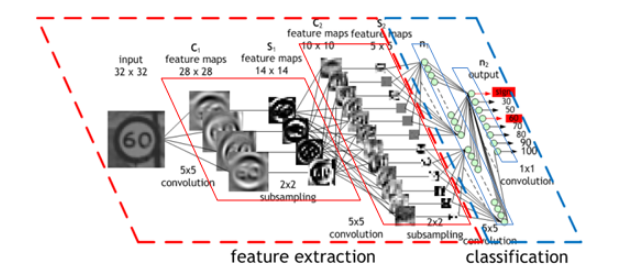

Langkah Menghitung CNN
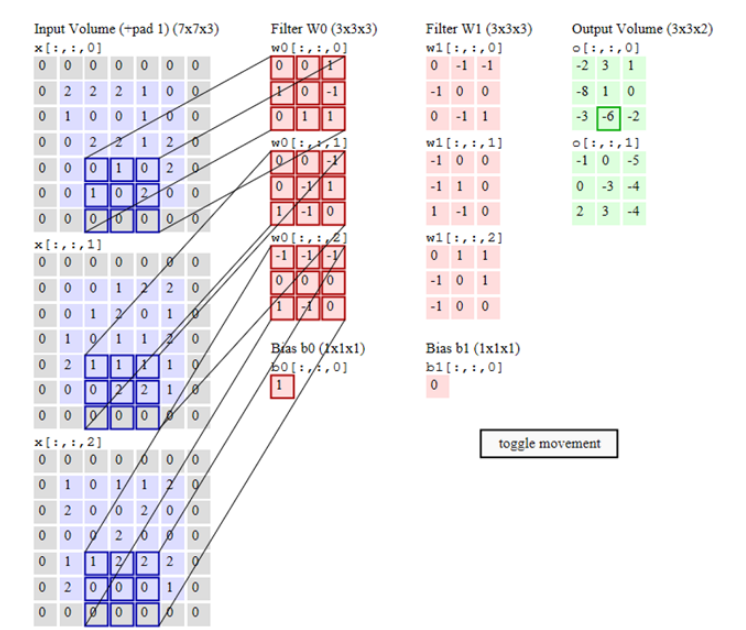

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Mengekstrak file zip

In [21]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip ='/content/drive/My Drive/animals.zip'                                  #Mendefinisikan file zip yang akan diekstrak 
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/')                                                   #Menempatkan file hasil ekstrak zip
zip_ref.close()                                                                   #Menghentikan fungsi zip.ref

### Menyiapkan folder untuk data gambar Kupu-kupu, Laba-Laba dan Lebah

In [22]:
import os                                                                         #Mengimpor modul os mengakses folder data
fold_kupu = os.path.join('animals/Kupu')                                          #Mendefinisikan Folder Training untuk gambar kupu-kupu
fold_laba= os.path.join('animals/Laba')                                           #Mendefinisikan Folder Training untuk gambar laba-laba
fold_lebah = os.path.join('animals/Lebah')                                        #Mendefinisikan Folder Training untuk gambar lebah

print('Jumlah total gambar kupu-kupu:', len(os.listdir(fold_kupu)))               #Menampilkan jumlah gambar di dalam folder kupu-kupu
print('Jumlah total gambar laba-laba:', len(os.listdir(fold_laba)))               #Menampilkan jumlah gambar di dalam folder laba-laba
print('Jumlah total gambar lebah:', len(os.listdir(fold_lebah)))                  #Menampilkan jumlah gambar di dalam folder lebah

print("Menampilkan nama file gambar:")                                     
file_kupu = os.listdir(fold_kupu)                                                 #Mendaftar file di dalam folder kupu-kupu
print("Kupu-kupu:",file_kupu[:5])                                                 #Menampilkan nama 5 file pertama di dalam folder kupu-kupu

file_laba = os.listdir(fold_laba)                                                 #Mendaftar file di dalam folder laba-laba
print("Laba-laba:",file_laba[:5])                                                 #Menampilkan nama 5 file pertama di dalam folder laba-laba

file_lebah = os.listdir(fold_lebah)                                               #Mendaftar file di dalam folder lebah
print("Lebah:",file_lebah[:5])                                                   #Menampilkan nama 5 file pertama di dalam folder lebah

Jumlah total gambar kupu-kupu: 840
Jumlah total gambar laba-laba: 823
Jumlah total gambar lebah: 840
Menampilkan nama file gambar:
Kupu-kupu: ['buttefly.1438.jpeg', 'buttefly.1165.jpeg', 'buttefly.864.jpeg', 'buttefly.1031.jpeg', 'buttefly.1119.jpeg']
Laba-laba: ['spyder.1551.jpeg', 'spyder.1326.jpeg', 'spyder.1234.jpeg', 'spyder.1302.jpeg', 'spyder.1532.jpeg']
Lebah: ['35860228113_5bf141e3f2_n.jpg', '28498682167_5746a935d3_m.jpg', '34155687125_62de772c9e_n.jpg', '22536803594_aec751ede3_m.jpg', '25990554167_defb23787e_n.jpg']


##### Keterangan :


Dapat dilihat bahwa total gambar kupu-kupu sebanyak 840, laba-laba sebanyak 823 dan lebah sebanyak 840

### Menampilkan gambar Kupu-kupu, Laba-laba dan Lebah dalam satu tampilan

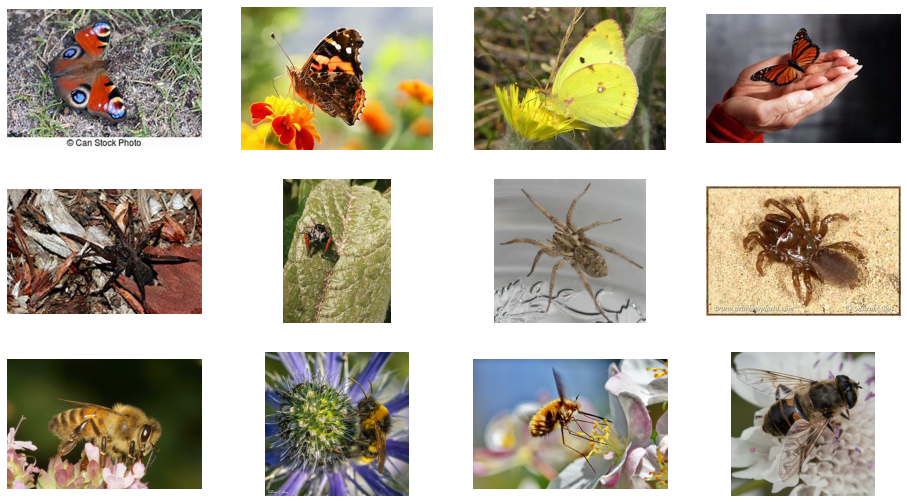

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
import matplotlib.image as mpimg

nrows = 3                                                                         #Jumlah baris tampilan gambar
ncols = 4                                                                         #Jumlah baris tampilan gambar

pic_index = 0                                                                     #Index awal untuk iterasi gambar

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)                                         #Mengatur gambar output matplotlib, dan ukurannya agar menjadi 4*6 gambar

pic_index += 4                                                                    #Index tambah bertambah 4 setiap baris
gbr_tampil_kupu  = [os.path.join(fold_kupu, fname)                                #Menampilkan gambar kupu 
                      for fname in file_kupu[pic_index-4:pic_index]]
gbr_tampil_laba    = [os.path.join(fold_laba , fname)                             #Menampilkan gambar laba
                      for fname in file_laba [pic_index-4:pic_index]]
gbr_tampil_lebah   = [os.path.join(fold_lebah, fname)                             #Menampilkan gambar lebah
                      for fname in file_lebah[pic_index-4:pic_index]]

for i, img_path in enumerate(gbr_tampil_kupu+gbr_tampil_laba+gbr_tampil_lebah):
  sp = plt.subplot(nrows, ncols, i + 1)                                           #Mengatur subplot; indeks subplot dimulai dari 1
  sp.axis('Off')                                                                  #Tidak menampilkan Gridlines

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Menggunakan Image Generator
Mengimpor modul yang digunakan

In [24]:
import tensorflow as tf                                                           #Mengimpor modul tensorflow 
import keras_preprocessing                                                        #Mengimpor modul keras 
from keras_preprocessing import image                                             #Mengimpor keras_preprocessing untuk gambar  
from keras_preprocessing.image import ImageDataGenerator                          #Mengimpor Image Generator

###### Keterangan :
Tensorflow merupakan library open source (sumber terbuka). Komputasi numerik dalam modul ini mengintegrasikan penggunaan grafik aliran data (data flow graph).

Keras merupakan library deep learning yang luar biasa. Salah satu faktor yang
membuat keras sangat populer adalah penggunaannya yang minimalis dan tidak
kompleks dalam mengembangkan deep learning. Keras dibangun di atas
Tensorflow yang menjadikan Keras sebagai API dengan level lebih tinggi (Higher
level API) dari Tensorflow sehingga interface-nya lebih mudah dari Tensorflow.
Keras sangat cocok untuk mengembangkan model deep learning dengan waktu
yang lebih singkat atau untuk pembuatan prototipe.

### Melakukan Augmentasi & Pemisahan Data menjadi Training dan Validation
Data dikelompokkan menjadi Data Training dan Data Validasi, masing masing folder tersebut masih juga terbagi ke dalam folder Kupu-kupu, Laba-laba dan Lebah untuk melakukan pelabelan menggunakan Image Generator.
Dengan data training sebesar 70% dan data validasi sebesar 30%

In [25]:
BASIS_DIR = "/content/animals/"                                                   #Menyiapkan folder utama
training_datagen = ImageDataGenerator(                                            #Image generator
      rescale = 1./255,                                                           #Menormalisasi data
                                           
      width_shift_range=0.2,                                                      #Menerapkan skenario pelebaran gambar hingga hingga sebanyak 0.2 dari ukuran asli
      height_shift_range=0.2,                                                     #Menerapkan skenario peninggian gambar hingga hingg sebanyak 0.2 dari ukuran asli
      shear_range=0.2,                                                            #Menerapkan skenario pemangkasan gambar gambar hingga sebanyak 0.2 dari ukuran asli 
      zoom_range=0.2,                                                             #Menerapkan skenario zoom gambar hingga sebesar 0.2 
      horizontal_flip=True,                                                       #Menerapkan skenario putar balik gambar secara horizontal 
      fill_mode='nearest',                                                        #Mengisi piksel yang kosong dengan nilai piksel terdekat 

      validation_split=0.3                                                        #70% Data Training, 30% Data Validasi
      )

##### Keterangan 
Pada perintah diatas kita melakukan :

Rescaling data menjadi 1/255.

Width image skala 0.2,                                                      

Height image skala 0.2,

Shearing image skala 0.2

Zooming image dengan range 0.2

Melakukan Horizontal flip


### Pelabelan data menggunakan Image Data Generator berdasarkan Folder

In [26]:
train_generator = training_datagen.flow_from_directory(                           #Generator data training
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,                                                                   
  subset='training'                                                               #Untuk data training
  )

validation_generator = training_datagen.flow_from_directory(                      #Generator data validasi
	BASIS_DIR,                                                                      #Folder target untuk digenerasi
	target_size=(150,150),                                                          #Mengubah resolusi seluruh gambar menjadi 150x150 piksel
	class_mode='categorical',                                                       #Kelas data kategori untuk klasifikasi multivariabel
  shuffle=True,
  subset='validation'                                                             #Untuk data validasi
  )

Found 1753 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


#### Keterangan :

target size merupakan dimensi dari citra yang akan digunakan dalam proses training

batch size merupakan banyaknya citra yang dimasukan dalam setiap steps training.

class mode merupakan metode pemilihan klasifikasi

categorical merupakan 1,2,3,4,5

shuffle merupakan data didalam folder tersebut diacak sehingga tidak sesuai urutan yang ada seperti urutan alfabetik.

subset merupakanuntuk data training/validasi

### Membangun Model Jaringan Saraf Tiruan
Model yang digunakan adalah model Sequential 

In [27]:
model = tf.keras.models.Sequential([                                                 #Membentuk model sequential
                                                                                     #Bentuk input adalah gambar dengan ukuran 150x150 dengan 3 byte warna
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                            #Layer Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                            #Layer Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),                                                       #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),                                   #Hiden layer pertama dengan 512 neuron
    
    tf.keras.layers.Dense(512, activation='relu'),                                   #Hiden layer kedua dengan 512 neuron
    
    tf.keras.layers.Dense(3, activation='softmax')                                   #Layer output
])

model.summary()                                                                      #Menampilkan summary model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

#### Keterangan : 
Sequential untuk model neural network kita yang berupa sequential network. Untuk diketahui, dasar dari inisialisasi neural network selain sequential adalah graph.

Conv2D untuk menjalankan operasi konvolusional pada gambar latih.

MaxPooling2D untuk operasi pooling nya.

Flatten untuk membentuk ulang fitur (reshape feature map) menjadi sebuah vector agar bisa kita gunakan sebagai input dari fully-connected layer.

Dense untuk menjalankan full connection neural network.


Rectified Linear Unit (ReLU) akan menghilangkan vanishing gradient dengan cara menerapkan fungsi aktivasi element sebagai f(x)=max⁡(0,x) alias aktivasi elemen akan dilakukan saat berada di ambang batas 0. Kelebihan dan kekurangan dalam penggunaan ReLU :
(+) : Bisa mempercepat gradien stokastik dibandingkan dengan fungsi sigmoid / tan h karena ReLU berbentuk linear

(+) : Tidak menggunakan operasi eksponensial seperti sigmoid/tan h, sehingga bisa melakukan dengan pembuatan matriks aktivasi saat ambang batas berada pada nilai 0.

(-) : ReLU bisa rapuh saat masa training dan mati karena gradien besar yang mengalir melalui ReLU menyebabkan update bobot, sehingga neuron tidak aktif pada datapoint lagi. Jika ini terjadi, maka gradien yang mengalir melalui unit akan selamanya nol dari titik itu. Artinya, unit ReLU dapat mati secara ireversibel selama pelatihan karena mereka dapat melumpuhkan data manifold. 



Softmax berfungsi untuk menghitung probabilitas dari setiap kelas target atas semua kelas target yang memungkinkan dan akan membantu untuk menentukan kelas target untuk input yang diberikan. Keuntungan utama menggunakan Softmax adalah rentang probabilitas output dengan nilai 0 hingga 1, dan jumlah semua probabilitas akan sama dengan satu. Jika fungsi softmax digunakan untuk model multi-klasifikasi, dia akan mengembalikan peluang dari masing-masing kelas dan kelas target akan memiliki probabilitas tinggi. Softmax menggunakan eksponensial (e-power) dari nilai input yang diberikan dan jumlah nilai eksponensial dari semua nilai dalam input. Maka rasio eksponensial dari nilai input dan jumlah nilai eksponensial adalah output dari fungsi softmax.

### Melakukan Kompilasi Model

In [28]:
model.compile(loss = 'categorical_crossentropy',                                  #Loss function Yang digunakan untuk Klasifikasi Kategori Lebih Dari 2
              optimizer='Adam',                                                   #Fungsi optimizer menggunakan adam
              metrics=['accuracy'])                                               #Menampilkan akurasi model training

#### Keterangan : 
loss = adalah metode pengukuran nilai loss berdasarkan pada nilai apa. karena Membuat flow datanya kita menggunakan categorical sehingga pada nilai loss ini kita juga menggunakan categorical loss.

Optimizer = merupakan metode optimasi yang digunakan.

Metrics = Nilai matriks yang diukur pada project ini kita menggunakan nilai akurasi sebagai nilai pengukurannya. Untuk lainnya bisa baca di sini

In [31]:
history = model.fit(train_generator,
                              steps_per_epoch=int(1753/32),
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=int(750/32))

Epoch 1/50
54/54 [==============================] - 45s 837ms/step - loss: 0.5918 - accuracy: 0.7670 - val_loss: 0.7439 - val_accuracy: 0.7160
Epoch 2/50
54/54 [==============================] - 45s 833ms/step - loss: 0.6184 - accuracy: 0.7501 - val_loss: 0.7248 - val_accuracy: 0.6916
Epoch 3/50
54/54 [==============================] - 44s 824ms/step - loss: 0.5882 - accuracy: 0.7583 - val_loss: 0.6811 - val_accuracy: 0.7405
Epoch 4/50
54/54 [==============================] - 45s 828ms/step - loss: 0.5778 - accuracy: 0.7728 - val_loss: 0.5806 - val_accuracy: 0.7921
Epoch 5/50
54/54 [==============================] - 44s 824ms/step - loss: 0.5489 - accuracy: 0.7809 - val_loss: 0.6395 - val_accuracy: 0.7446
Epoch 6/50
54/54 [==============================] - 44s 820ms/step - loss: 0.5374 - accuracy: 0.7937 - val_loss: 0.6321 - val_accuracy: 0.7568
Epoch 7/50
54/54 [==============================] - 44s 814ms/step - loss: 0.5188 - accuracy: 0.7873 - val_loss: 0.5608 - val_accuracy: 0.7867

#### Keterangan :

train_generator = merupakan data generator yang sudah kita proses sehingga menjadi tf-data ini merupakan data training.

Steps per epoch merupakan banyaknya steps / langkah untuk menyelesaikan 1 epoch.
epoch = banyaknya proses iterasi/ pengulangan pada training

validation_data merupakan validation data yang dievaluasi pada setiap epoch berakhir

validation_steps merupakan banyaknya steps / langkah untuk menyelesaikan 1 epoch.

In [34]:
history.history['loss']

[0.5917917490005493,
 0.6183884739875793,
 0.5882220268249512,
 0.5778131484985352,
 0.5489330291748047,
 0.5373761653900146,
 0.5188266634941101,
 0.5199368000030518,
 0.524715781211853,
 0.517767071723938,
 0.4760601818561554,
 0.49194690585136414,
 0.4651344120502472,
 0.4960949420928955,
 0.45459288358688354,
 0.4865078926086426,
 0.44959086179733276,
 0.4241923987865448,
 0.4304676651954651,
 0.4238070547580719,
 0.42897045612335205,
 0.4238947629928589,
 0.4157451391220093,
 0.4022650122642517,
 0.43125244975090027,
 0.3858957886695862,
 0.3929024934768677,
 0.383364737033844,
 0.3960604667663574,
 0.37031152844429016,
 0.34721413254737854,
 0.35662657022476196,
 0.3989627957344055,
 0.38407787680625916,
 0.3695702850818634,
 0.35570621490478516,
 0.3507467806339264,
 0.3752129375934601,
 0.34334295988082886,
 0.3570762574672699,
 0.31944042444229126,
 0.33080199360847473,
 0.3332079350948334,
 0.3887338936328888,
 0.37612777948379517,
 0.3228573501110077,
 0.30935734510421753,
 

#### Keterangan :
Hasil Loss Training

In [35]:
history.history['accuracy']

[0.766995906829834,
 0.7501452565193176,
 0.7582800984382629,
 0.7728065252304077,
 0.7809413075447083,
 0.7937245965003967,
 0.7873329520225525,
 0.7867518663406372,
 0.7931435108184814,
 0.7943056225776672,
 0.8082510232925415,
 0.7995351552963257,
 0.8146426677703857,
 0.7966298460960388,
 0.8187100291252136,
 0.7966298460960388,
 0.816385805606842,
 0.834398627281189,
 0.8320744037628174,
 0.8367228507995605,
 0.8338175415992737,
 0.8413712978363037,
 0.8413712978363037,
 0.8425334095954895,
 0.8262637853622437,
 0.8512492775917053,
 0.8518303036689758,
 0.8483439683914185,
 0.8413712978363037,
 0.8646135926246643,
 0.8628703951835632,
 0.8576409220695496,
 0.8454387187957764,
 0.8529924750328064,
 0.8646135926246643,
 0.8622893691062927,
 0.8558977246284485,
 0.8622893691062927,
 0.8721673488616943,
 0.8640325665473938,
 0.8797211050987244,
 0.8744915723800659,
 0.8768157958984375,
 0.8419523239135742,
 0.8698431253433228,
 0.875,
 0.8855316638946533,
 0.8803021311759949,
 0.88785

#### Keterangan :
Hasil Accuracy Training

### Ploting Akurasi Training dan Validasi
Melihat pergerakan besaran nilai akurasi Training dan Validasi

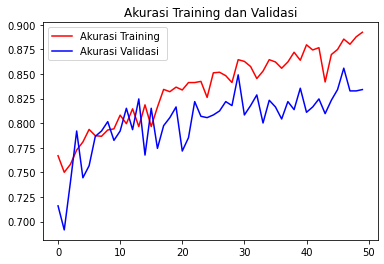

<Figure size 432x288 with 0 Axes>

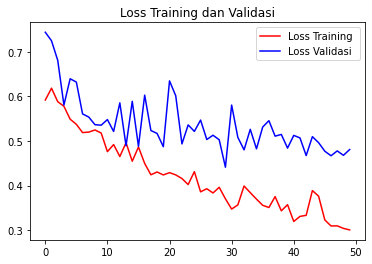

<Figure size 432x288 with 0 Axes>

In [32]:
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

plt.plot(epochs, loss, 'r', label='Loss Training ')                               #Plot nilai loss training                     
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')                            #Plot nilai loss validasi
plt.title('Loss Training dan Validasi')                                           #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

### Uji Coba Model Klasifikasi Gambar Kupu-kupu, Laba-laba dan Lebah
Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar hewan yang membentuk Kupu-kupu, Laba-laba dan Lebah

Saving 14538525841_9a5f0eef28_n.jpg to 14538525841_9a5f0eef28_n (2).jpg
14538525841_9a5f0eef28_n.jpg
Gambar ini termasuk ke kelas Lebah


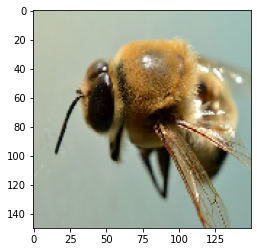

In [38]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir('animals')
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('Gambar ini termasuk ke kelas', class_list[j])
      break

#### Kesimpulan :

Pada model ini menghasilkan akurasi sebesar 83% untuk klasifikasi gambar kupu-kupu, laba-laba dan lebah, dengan menggunakan data training sebesar 70% dan data validation sebesar 30%